<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/walmart_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates
import datetime
import pickle

#pandas!
pd.set_option('display.max_rows', 500) 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Minimum Wage dataset**

In [4]:
mw = pd.read_csv("/content/drive/MyDrive/hannah_research/data/target_walmart_min_wage.csv")

#dates!
mw['date'] = pd.to_datetime(mw['date'])
#mw.set_index(pd.DatetimeIndex(mw['date']))
mw['month_year'] = pd.to_datetime(mw['date']).dt.strftime('%Y-%m')
mw


,date,target,walmart,month_year
0,2012-01-01,7.25,7.25,2012-01
1,2012-02-01,7.25,7.25,2012-02
2,2012-03-01,7.25,7.25,2012-03
3,2012-04-01,7.25,7.25,2012-04
4,2012-05-01,7.25,7.25,2012-05
5,2012-06-01,7.25,7.25,2012-06
6,2012-07-01,7.25,7.25,2012-07
7,2012-08-01,7.25,7.25,2012-08
8,2012-09-01,7.25,7.25,2012-09
9,2012-10-01,7.25,7.25,2012-10


### **Min wage dictionary**
First by mw_region, then by month_year.

In [6]:
regions = mw.columns.to_list()

# get rid of date and month_year!
regions.remove('date')
regions.remove('month_year')

year_months = list(set(mw.month_year.to_list()))

mw_dict = {}

for region in regions:
  mw_dict[region] = {}
  for ym in year_months:
    mw_dict[region][ym] = mw.loc[mw.month_year == ym, region].iloc[0]




## **Review Dataset**

In [ ]:
# The entire reveiw set...

data = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_08_03_21.txt", sep ='\t')

#dates!
data['review_date'] = pd.to_datetime(data['review_date'])
data.set_index(pd.DatetimeIndex(data['review_date']))

data.shape

(2400712, 47)

In [ ]:
# Only looking at Washington state, Oregon, Illinois, Maryland at the moment

df = data[data.state.isin(['WA', 'OR', 'IL', 'MD', 'VA', 'DC'])]
df.shape
df.head
df.loc[[10]]

,platform,scrape_company_num,date_scraped,scrape_folder_name,scrape_file_name,base_url,page_num,parent_company,be_careful,company_name,scraped_from_url,empid,language,id,review_url,uid,review_date,review_month,review_day,review_year,parsable_loc,state,city,country,location,job_title,norm_job_title,current,length_of_employment,overall_rating,work_life_rating,compensation_rating,job_security_rating,management_rating,culture_rating,review_title,review_text,pros,cons,advice_to_management,helpful_yes,helpful_no,recommend,ceo_approval,business_outlook,redacted,is_deletable
10,Indeed,81,2021-05-06,081_dollar_tree_05_06_21,indeed_05_06_21_dollar_tree_3120.htm,www.indeed.com/cmp/Dollar-Tree/reviews,3120,Dollar Tree,0,Dollar Tree,www.indeed.com/cmp/Dollar-Tree/reviews?start=3120,7d2afaa40240a56a,NaN,00006c940ea45e65,www.indeed.com/cmp/Dollar-Tree/reviews/work-is...,1ds94pldqh40j803,2019-12-16,12,16,2019,1,OR,Ontario,US,"Ontario, OR",Freight Manager,Freight Manager,1,NaN,3,2,3,2,3,3,"Work is fun, randomness is not","The work is enjoyable, should be great place t...",NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0


## **Job title clean-up (for review dataset)**

In [ ]:
# drop na in norm_job_title
df = df[df.norm_job_title.notna()]
df.shape

(270345, 47)

In [ ]:
jobs = df.norm_job_title.value_counts().to_frame().reset_index()
jobs.columns = ['norm_job_title', 'count']
jobs = jobs[jobs['count']>10]
print(jobs)

                            norm_job_title  count
0                                  Cashier  21459
1                          Sales Associate  16211
2          Customer Service Representative  12723
3                              Crew Member  11969
4     Customer Service Associate / Cashier   7165
...                                    ...    ...
1148                         Head of Sales     11
1149               Senior Sales Specialist     11
1150                          Bulk Manager     11
1151                    Senior Coordinator     11
1152                 Engagement Specialist     11

[1153 rows x 2 columns]


In [ ]:
remove = ['Specialist', 'Certified Trainer',
        'E-commerce Specialist', 'Senior Program Manager', 'Kitchen Designer',
         'Regional Manager', 'Appliance Technician',
         'Regional Sales Manager', 'Business Consultant',
         'Lead Technician',  'Field Technician',
         'Technical Project Manager', 'Regional Director', 'Senior Director',
          'Senior Inventory Analyst',  'Business Operations Manager', 
          'Mentor', 'Financial Specialist', 'Telecommunications Technician',
         'Tire Technician', 'Account Executive', 'Auditor','Director of Operations','Laboratory Technician', 'Director of Marketing', 
          'Director of Human Resources', 'Technical Consultant', 'Director of Sales and Marketing', 'Human Resources Business Partner', 
          'Car Sales Executive', 'SAP Consultant', 'MD',
          'Data Center Technician', 'Genius']

'''
definitely=   ['Pharmacist', 'Staff Pharmacist', 'Tire Technician', 'Account Executive', 'Executive Assistant', 'Software Engineer',
              'Business Analyst', 'Optician','Engineer', 'Pharmacy Intern', 'Bookkeeper', 'Network Engineer', 'Senior Analyst', 'Auditor',
              'Chief Engineer', 'Financial Analyst', 'Senior Software Engineer', 'Developer', 'Senior Pharmacy Technician', 'Volunteer',
              'Senior Certified Pharmacy Technician', 'Director of Operations', 'Business Development Manager', 'Data Analyst',
              'Senior Business Analyst', 'Database Administrator','Software Test Engineer', 'Chief Engineer', 'Contractor', 'Senior Financial Analyst',
              'Laboratory Technician', 'Director of Marketing', 'Software Architect', 'Quality Assurance Engineer', 'Systems Administrator', 'Senior Developer',
              'Intern Manager', 'Software Developer', 'Computer Specialist', 'Systems Analyst', 'Pharmacy Technician Intern', 'Executive Administrative Assistant',
              'Director of Human Resources', 'Computer Technician', 'System Engineer', 'Senior Accountant', 'Technical Consultant', 'Director of Sales and Marketing',
              'Senior Network Engineer', 'Senior Operations Manager', 'Marketing Intern', 'Front End Developer', 'IT Project Manager', 'Software Development Intern',
              'Externship', 'Independent Contractor', 'Senior System Engineer', 'Senior Systems Analyst', 'Senior Engineer', 'Pharmacist in Charge', 'Owner',
              'Computer Consultant','Software Engineering Manager', 'Human Resources Supervisor', 'IT Analyst', 'Network Analyst', 'Operations Analyst', 
              'Senior Consultant', 'Network Technician', 'Network Technician', 'Human Resources Business Partner', 'Senior Quality Assurance Analyst',
              'Logistics Analyst', 'Emergency Room Technician', 'Senior Account Executive', 'Building Engineer', 'IT Technician', 'Billing Analyst',
              'Owner/Manager', 'Car Sales Executive', 'Test Engineer', 'Operations Intern', 'Web Developer', 'SAP Consultant', 'Store Owner', 'Network Specialist',
              'Security Engineer', 'IT Security Specialist', 'Network Administrator', 'Senior Technical Support', 'MD', '.NET Developer', 'Therapist',
              'Electrician', 'Principal Software Engineer', 'Optical Technician', 'Programmer Analyst', 'Performance Engineer' ]

maybe = ['Pharmacy Technician', 'Specialist', 'Certified Pharmacy Technician', 'Administrative Assistant', 'Office Assistant', 'Certified Trainer',
         'Quality Assurance Analyst', 'E-commerce Specialist', 'Pharmacy Assistant', 'Senior Program Manager', 'Kitchen Designer',
         'File Clerk/Office Assistant', 'Accounts Receivable Clerk', 'Mechanic', 'Accounts Payable Clerk', 'Quality Assurance Manager',
         'Regional Manager', 'Business Systems Analyst', 'Pharmacy Clerk', 'Product Owner', 'Maintenance Mechanic', 'Appliance Technician',
         'Security Guard', 'Regional Sales Manager', 'Maintenance Engineer', 'Data Center Technician', 'Genius', 'Business Consultant', 'Pricing Analyst',
         'Lead Technician', 'Quality Assurance Tester', 'Field Technician', 'Accounts Payable Specialist', 'Network Operations Technician', 
         'Development Operations Engineer', 'Technical Project Manager', 'Regional Director', 'OSP Engineer', 'Senior Director',
         'Diesel Mechanic','Rf Engineer', 'Senior Inventory Analyst', 'Automation Engineer', 'Business Operations Manager', 'Secretary',
         'Technical Analyst', 'Mentor', 'Optometric Assistant', 'Financial Specialist', 'Automotive Mechanic', 'Telecommunications Technician']
'''

#removed: technician, consultant, specialist, data, director

signal_words= ['Pharmacist', 'Pharmacy', 'Intern', 'Software', 'Engineer', 'Analyst', 'Optician', 'Opthometrist',
               'Bookkeeper', 'Network', 'Auditor', 'Developer', 'Volunteer', 'Business Development', 'Database',
               'Contractor', 'Computer', 'Systems', 'System', 'Owner', 'Human Resources', 'IT ', 'EMT', 'Data ',
               'Externship', 'Engineering', 'Operations', 'Development', 'Web ', 'MD', 'Therapist', 'Electrician', 'Optical',
               'Programmer', 'Mechanic', 'Regional', 'Security Guard', 'Genius', 'Technical', 'Optometric', 'Optometrist',
               'Anonymous', 'anonymous', 'Accountant', 'Accounts Receivable', 'Accounts Payable', 'Security Guard',
               'Quality Assurance', 'QA ', 'Optometric', 'Therapist', 'President']

In [ ]:
# loop through, delete row if you find a "signal word"
#df = df.reset_index()
print(df.shape)
counter = 0
to_drop = []
for i, row in df.iterrows():
  
    counter +=1
    #if counter == 5000:
      #break

    for word in signal_words:
      if word in row.norm_job_title:
          print(i)
          print(row.norm_job_title, ' | ', row.company_name)
          to_drop.append(i)

    if row.norm_job_title in remove:
          print(i)
          print(row.norm_job_title, ' | ', row.company_name)
          to_drop.append(i)


df = df.drop(to_drop)
print(df.shape)

Streaming output truncated to the last 5000 lines.
Night Auditor  |  Staybridge Suites
2093519
Pharmacy Technician  |  CVS Health
2093682
Technical Trainer  |  PetSmart
2093959
Senior Financial Analyst  |  Nike
2093984
Chief Engineer  |  Fairfield Inn & Suites 
2094012
Intern  |  Walgreens
2094291
Account Executive  |  MillerCoors
2094372
Accounts Payable Specialist  |  Potbelly Sandwich Shop
2094507
Automation Engineer  |  Verizon
2094720
Pharmacy Manager  |  Rite Aid
2094769
Data Specialist  |  Kmart
2094870
Technical Support Specialist  |  Best Buy
2094949
Pharmacy Clerk  |  CVS Health
2094950
Operations Supervisor  |  UPS
2095379
Specialist  |  DICKS Sporting Goods
2095511
Pharmacy Technician  |  Walgreens
2095625
Human Resources Assistant  |  Embassy Suites by Hilton
2095701
Computer Specialist  |  Best Buy
2095785
Pharmacy Technician  |  Walmart
2096052
Mechanic  |  Amazon.com
2096131
Pharmacy Technician  |  CVS Health
2096351
Data Entry Clerk  |  Sears
2096385
Specialist  |  Pet

# **CHECKPOINT!! (Review dataset)**

In [ ]:
# **CHECKPOINT!!**

#df.to_pickle("/content/drive/MyDrive/hannah_research/data/mw_indeed.pkl")

df = pd.read_pickle("/content/drive/MyDrive/hannah_research/data/mw_indeed.pkl")
df.shape

(253465, 47)

In [ ]:
df.columns

Index(['platform', 'scrape_company_num', 'date_scraped', 'scrape_folder_name',
       'scrape_file_name', 'base_url', 'page_num', 'parent_company',
       'be_careful', 'company_name', 'scraped_from_url', 'empid', 'language',
       'id', 'review_url', 'uid', 'review_date', 'review_month', 'review_day',
       'review_year', 'parsable_loc', 'state', 'city', 'country', 'location',
       'job_title', 'norm_job_title', 'current', 'length_of_employment',
       'overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_title', 'review_text', 'pros', 'cons', 'advice_to_management',
       'helpful_yes', 'helpful_no', 'recommend', 'ceo_approval',
       'business_outlook', 'redacted', 'is_deletable'],
      dtype='object')

### **Useful code: labels for each region (review dataset)**


In [ ]:
# districts
seattle = ['Seattle', 'North Seattle', 'Northgate', 'Lake City', 'North Seattle',
                'Windermere', 'Ravenna', 'University District', 'Lake Union', 'Lower Wallingford',
                'Fremont', 'Ballard', 'Central Seattle', 'Magnolia', 'Queen Anne', 'Capitol Hill',
                'Broadway', 'Stevens', 'Madison Park', 'South Lake Union', 'Central Area', 'Atlantic',
                'Madrona', 'Harrison', 'Denny-Blaine', 'South End', 'Rainier Valley', 'Columbia City',
                'Seward Park', 'Beacon Hill', 'West Seattle', 'Delridge', 'Georgetown', 'Southeast Seattle']

pugb = ['Portland', 'Forest Grove', 'Cornelius', 'Hillsboro', 'Beaverton', 'Sherwood', 'King City', 'Tigard', 'Tualatin',
             'Wilsonville', 'Durham', 'River Grove', 'Lake Oswego', 'West Linn', 'Oregon City', 'Gladstone', 'Happy Valley',
             'Johnson City', 'Milwaukie', 'Gresham', 'Fairview', 'Wood Village', 'Troutdale', 'Maywood Park']

chicago = list(set(['Chicago','Old Town Triangle', 'Fernwood', 'Wildwood', 'Wentworth Gardens', 'Jackowo', 'Clearing', 'Mount Greenwood', 
           'Tri-Taylor', 'Albany Park', 'Roseland', 'Belmont Terrace', 'South Lawndale', 'Parkview', 'Forest Glen', 
           'Roscoe Village', 'South Commons', 'Wicker Park', 'Cragin', 'Near North Side', 'Schorsch Village', 'Kensington', 
           'Buena Park', 'Austin, Humboldt Park', 'Big Oaks', 'Longwood Manor', 'Galewood', 'Lake Meadows', 
           'Wrightwood Neighbors', 'Chatham, Roseland', 'Old Irving Park', 'Near West Side', 'Lithuanian Plaza', 
           'Prairie Shores', 'Cabrini–Green', 'Canaryville', 'Margate Park', 'Lincoln Park', 'East Chatham', 
           'Greektown', 'Arcadia Terrace', 'Museum Campus', 'South Edgebrook', 'Belmont Cragin', 'Woodlawn', 'Lilydale', 
           'Chicago Lawn', 'Old Town', 'Morgan Park', 'Chrysler Village', 'Portage Park', 'Montclare', 'North Lawndale', 
            'Smith Park', 'West Woodlawn', 'Wrightwood', 'West Morgan Park', 'Ravenswood', 'East Pilsen', 
           'Douglas', 'Old Norwood', 'The Gap', 'Bowmanville', 'The Island', 'Sheridan Park', 'Oakland', 'South Shore', 
           'Lakewood', 'Balmoral', 'West Loop', 'Garfield Ridge', 'Sleepy Hollow', 'Vittum Park', 'Grand Boulevard', 
           'Lake View', 'Humboldt Park', 'Ford City', 'Hanson Park', 'Back of the Yards', 'Douglas Park', 'Irving Park', 
           'Gold Coast', 'Kosciuszko Park', 'West Rogers Park', 'Hollywood Park', 'Logan Square', 'Park West', 'Bridgeport',
           'West Lawn', 'Little Village', 'Dearborn Homes', 'Grand Crossing', 'Pill Hill', 'Polish Downtown', "River's Edge",
           'Lakeview', 'Edgewater Glen', 'East Garfield Park', 'West Pullman', 'Magnificent Mile', 'LeClaire Courts', 
           'Eden Green', 'Near South Side', 'Washington Heights', 'West Chatham', 'Fuller Park', 'Edgewater', 'Washington Park', 
           'North Halsted', 'Gage Park', 'Ashburn', 'Golden Gate', 'McKinley Park', 'North Austin', 'Clearing West', 
           'Pullman', 'Belmont Gardens', 'Rogers Park', 'Gresham', 'Nortown', 'Lower West Side', 'East Beverly', 'Edgebrook', 
           'Englewood', 'Stony Island Park', 'Clarendon Park', 'North Center', 'Ravenswood Gardens', 'Ravenswood Manor', 
           'Andersonville', 'South Chicago', 'Graceland West', 'Hermosa', 'West Town', 'Hamilton Park', 'Archer Heights', 
           'South Loop', 'Greater Grand Crossing', 'Streeterville', 'Crestline', 'Ashburn Estates', 'New Chinatown', 
           'South Deering', 'Fulton River District', 'Dunning', 'Ranch Triangle', 'Old Edgebrook', 'University Village', 
           'Kenwood', 'Kilbourn Park', 'Marquette Park', 'Beverly View', 'Burnside', 'Marshall Square', 'Fifth City', 
           'Park Manor', 'Auburn Gresham', 'River North', 'Beverly Woods', 'Brickyard', 'K-Town', "Printer's Row", 
           'North Mayfair', 'Little Italy', 'Sheffield Neighbors', 'Homan Square', 'Austin', 'Uptown', 'East Hyde Park',
           'Chinatown', 'Irving Woods', 'Wacławowo', 'Cottage Grove Heights', 'Belmont Central',  'Bronzeville', 
           'Avalon Park', 'Goose Island', 'The Loop', 'Oriole Park', 'River West', "Talley's Corner", 'The Villa', 
           'East Side', "St. Ben's", 'Altgeld Gardens', 'West Englewood', 'Hegewisch', 'Pilsen', 'Avondale', 
           'North Kenwood', 'Bucktown', 'Jefferson Park', 'West Chesterfield', 'West Garfield Park', 'South East Ravenswood', 
           'Ukrainian Village', 'Prairie Avenue Historic District', 'Clearing East', 'Beverly', 'New Eastside', 
           'Princeton Park', 'Scottsdale', 'Stateway Gardens', 'Polish Village', 'Belmont Heights', 'Dearborn Park', 
           'Kelvyn Park', 'Noble Square', 'Pulaski Park', 'West Humboldt Park', 'Kennedy Park', 'Sauganash', 
           'Merchant Park', 'Armour Square', 'Calumet Heights', 'Norwood Park West', 'East Village', 
           'Avondale Gardens', 'Groveland Park', 'Hyde Park', 'Avondale, Irving Park', 'Brighton Park', 'West Beverly', 
           'North Park', 'South Austin', 'Mayfair', 'Rosemoor', 'New City', 'Edison Park', 'Illinois Medical District',
           'Wrigleyville', 'Sheridan Station Corridor', 'Legends South', 'Northalsted "Boystown"', 'West Town', 
           'Logan Square', 'Heart of Chicago', "O'Hare", 'Peterson Park', 'Brainerd', 'Jackson Park Highlands',
           'West Elsdon', 'Union Ridge', 'Chatham', 'Rosehill', 'Central Station', 'Marynook', 'Norwood Park East', 
           'West DePaul', 'Lakeview', 'Palmer Square', 'Gladstone Park', 'Schorsch Forest View', 'Edgewater Beach', 
           'West Ridge', 'Loyola', 'Lincoln Square', 'Budlong Woods']))

cook = list(set(['Berwyn','Blue Island','Burbank','Calumet City','Chicago Heights','Country Club Hills','Countryside','Des Plaines','Elgin','Evanston','Harvey','Hickory Hills','Hometown',
'Markham','Northlake','Oak Forest','Orland Park','Palos Heights','Palos Hills','Palos Park','Park Ridge','Prospect Heights','Rolling Meadows','Cicero','Thornton','Wheeling',
'Worth','Proviso','Maine','Schaumburg','Palatine','Lyons','Bremen','Niles','Hanover','Orland','Elk Grove','Leyden','Bloom','Northfield','Rich','Berwyn','New Trier','Palos',
'Oak Park','Stickney','Norwood Park','Lemont','Calumet','Barrington','Riverside','River Forest','Alsip','Arlington Heights','Barrington Hills','Bedford Park','Bellwood','Berkeley',
'Bridgeview','Broadview','Brookfield','Burnham','Calumet Park','Chicago Ridge','Crestwood','Dixmoor','Dolton','East Hazel Crest','Elk Grove Village','Elmwood Park','Evergreen Park',
'Flossmoor','Ford Heights','Forest Park','Forest View','Franklin Park','Glencoe','Glenview','Glenwood','Golf','Harwood Heights','Hazel Crest','Hillside','Hinsdale','Hodgkins',
'Hoffman Estates','Homewood','Indian Head Park','Inverness','Justice','Kenilworth','La Grange','La Grange Park','Lansing','Lemont','Lincolnwood','Lynwood','Lyons','Matteson',
'Maywood','McCook','Melrose Park','Merrionette Park','Midlothian','Morton Grove','Mount Prospect','Niles','Norridge','North Riverside','Northbrook','Northfield','Oak Forest',
'Oak Lawn','Oak Park','Olympia Fields','Orland Hills','Orland Park','Palos Park','Park Forest','Phoenix','Posen','Richton Park','River Forest','River Grove', 'Riverdale','Riverside',
'Robbins','Roselle','Rosemont','Sauk Village','Schaumburg','Schiller Park','Skokie','South Barrington','South Chicago Heights','South Holland','Steger','Stickney','Stone Park',
'Streamwood','Summit','Thornton','Tinley Park','University Park','Westchester','Western Springs','Wheeling','Willow Springs','Wilmette','Winnetka','Worth']))

montgomery = [ 'Ashton','Barnesville','Beallsville','Bethesda','Boyds','Brinklow','Brookeville','Burtonsville','Cabin John','Chevy Chase','Clarksburg','Damascus',
'Derwood','Dickerson','Gaithersburg','Garrett Park','Germantown','Glen Echo','Kensington','Montgomery Village','Olney','Poolesville','Potomac','Rockville',
'Sandy Spring','Silver Spring','Spencerville','Takoma Park','Washington Groves']


prince_georges =  ['Berwyn Heights', 'Bladensburg', 'Bowie', 'Brentwood', 'Capitol Heights', 'Cheverly', 'College Park', 'Colmar Manor', 'Cottage City', 
                   'District Heights', 'Eagle Harbor', 'Edmonston', 'Fairmount Heights', 'Forest Heights', 'Glenarden', 'Greenbelt', 'Hyattsville', 
                   'Landover Hills', 'Laurel', 'Morningside', 'Mount Rainier', 'New Carrollton', 'North Brentwood', 'Riverdale Park', 'Seat Pleasant', 
                   'University Park', 'Upper Marlboro']


In [ ]:

'''
#INDICATORS

# columns of zeros
cols = ['seattle_large', 'washington_state',
        'portland_urban_growth_boundary', 'oregon_standard_nonurban',
        'chicago_large', 'cook_il', 'illinois',
        'prince_georges_md', 'montgomery_md_large', 'maryland',
        'washington_dc', 'virginia']

for col in cols:
  df[col] = 0

# washington state
df.loc[(df.state=='WA') & (df.city.isin(seattle)), 'seattle_large']=1
df.loc[(df.state=='WA') & (~df.city.isin(seattle)), 'washington_state']=1

# oregon
df.loc[(df.state=='OR') & (df.city.isin(pugb)), 'portland_urban_growth_boundary']=1
df.loc[(df.state=='OR') & (~df.city.isin(pugb)), 'oregon_standard_nonurban']=1

# illinois
df.loc[(df.state=='IL') & (df.city.isin(chicago)), 'chicago_large']=1
df.loc[(df.state=='IL') & (df.city.isin(cook)), 'cook_il']=1
df.loc[(df.state=='IL') & (~df.city.isin(chicago) & (~df.city.isin(cook))), 'illinois']=1

# maryland
df.loc[(df.state=='MD') & (df.city.isin(prince_georges)), 'prince_georges_md']=1
df.loc[(df.state=='MD') & (df.city.isin(montgomery)), 'montgomery_md_large']=1
df.loc[(df.state=='MD') & (~df.city.isin(montgomery) & (~df.city.isin(prince_georges))), 'maryland']=1

# washgington, d.c.
df.loc[df.state=='DC', 'washington_dc']=1

# virginia
df.loc[df.state=='VA', 'virginia']=1

'''

# LABELS

# washington state
df.loc[(df.state=='WA') & (df.city.isin(seattle)), 'mw_region']='seattle_large'
df.loc[(df.state=='WA') & (~df.city.isin(seattle)), 'mw_region']='washington_state'

# oregon
df.loc[(df.state=='OR') & (df.city.isin(pugb)), 'mw_region']= 'portland_urban_growth_boundary'
df.loc[(df.state=='OR') & (~df.city.isin(pugb)), 'mw_region']='oregon_standard_nonurban'

# illinois
df.loc[(df.state=='IL') & (df.city.isin(chicago)), 'mw_region']='chicago_large'
df.loc[(df.state=='IL') & (df.city.isin(cook)), 'mw_region']='cook_il'
df.loc[(df.state=='IL') & (~df.city.isin(chicago) & (~df.city.isin(cook))), 'mw_region']='illinois'

# maryland
df.loc[(df.state=='MD') & (df.city.isin(prince_georges)), 'mw_region']='prince_georges_md'
df.loc[(df.state=='MD') & (df.city.isin(montgomery)), 'mw_region']='montgomery_md_large'
df.loc[(df.state=='MD') & (~df.city.isin(montgomery) & (~df.city.isin(prince_georges))), 'mw_region']='maryland'

# washgington, d.c.
df.loc[df.state=='DC', 'mw_region']='washington_dc'

# virginia
df.loc[df.state=='VA', 'mw_region']='virginia'

df.mw_region

10         oregon_standard_nonurban
12                         illinois
18                    chicago_large
22                 washington_state
23                         virginia
                     ...           
2400675                    maryland
2400679                    virginia
2400699            washington_state
2400700         montgomery_md_large
2400701               chicago_large
Name: mw_region, Length: 253465, dtype: object

## **Month-year and date restrictions (review dataset)**

In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

In [ ]:
df = df[df.review_year>=2012]
df = df[df.review_year < 2020]
df.shape

(221333, 49)

### **Min wage continuous variable!**

In [ ]:
# adding in the mw values

df['min_wage_val'] = 0

for i, row in df.iterrows():
  df.loc[i, 'min_wage_val'] = mw_dict[row.mw_region][row.month_year]

print(df.min_wage_val.max())
print(df.min_wage_val.min())

16.0
7.25


# **CHECKPOINT 2! (review dataset)**

In [ ]:
# **CHECKPOINT 2!!**

#df.to_pickle("/content/drive/MyDrive/hannah_research/data/mw_indeed2.pkl")

df = pd.read_pickle("/content/drive/MyDrive/hannah_research/data/mw_indeed2.pkl")
df.shape

(221333, 50)

## **Minimum wage changes**

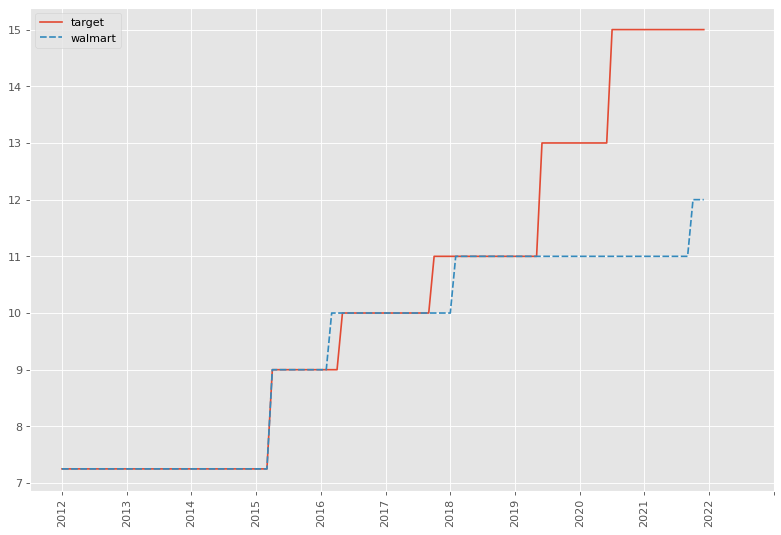

In [7]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw,)
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

### Washington State & Seattle

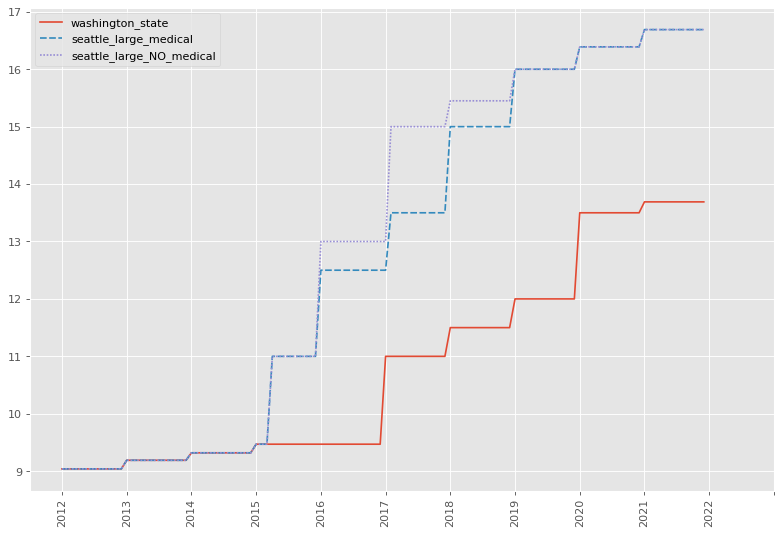

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'washington_state', 'seattle_large_medical', 'seattle_large_NO_medical']])
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

### Oregon and the Portland Urban Growth Boundary

Washington state is included because Portland is right on the border of Washington, and the greater metro area around Portland includes many cities in Washington.  Indeed, it appears as the though the PUGB minimum wage is trying to "keep pace" with the Washington State minimum wage.

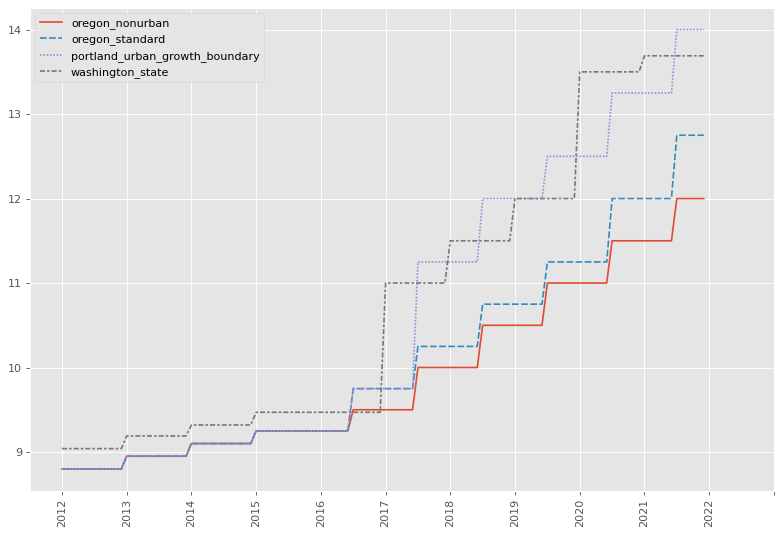

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'oregon_nonurban', 'oregon_standard', 'portland_urban_growth_boundary', 'washington_state']])
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

### Chicago, Cook County, and the rest of Illinois

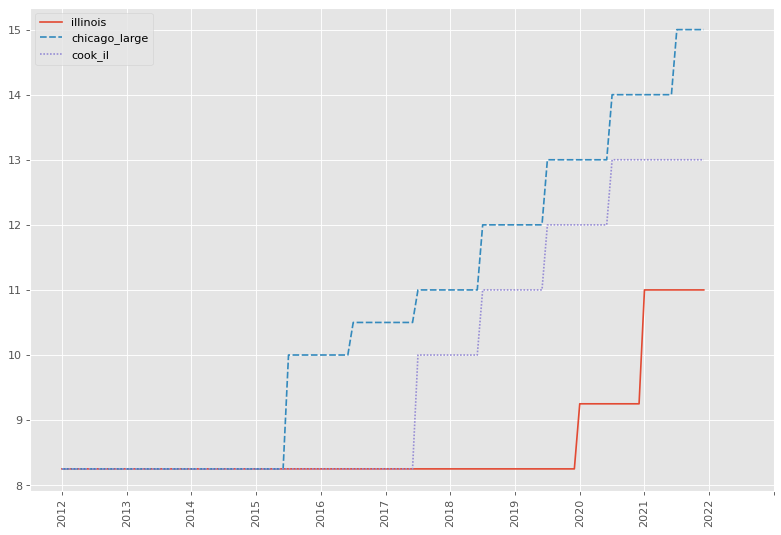

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'illinois', 'chicago_large', 'cook_il']])
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

### Maryland and the areas surrounding Washington, D.C.
Montgomery and Prince George's counties, which are part of the D.C. metropolitain area, have higher minimum wages compared to the rest of Maryland.  Virginia mininmum wage is also included because of its proximity to D.C.  Interesting to consider the differences between minimum wages in Baltimore and D.C., which are arguably both part of the same large metro area.

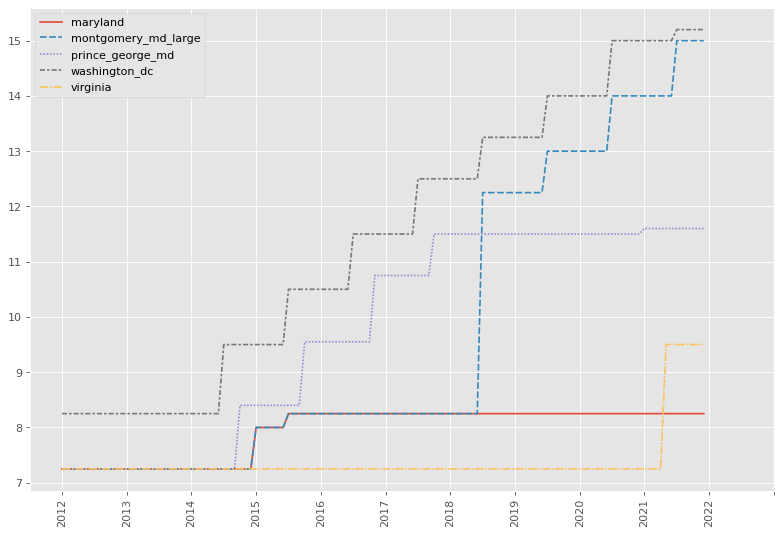

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'maryland', 'montgomery_md_large', 'prince_george_md', 'washington_dc', 'virginia']])
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

### Comparison of increase differentials: Washington, Oregon, Illinois


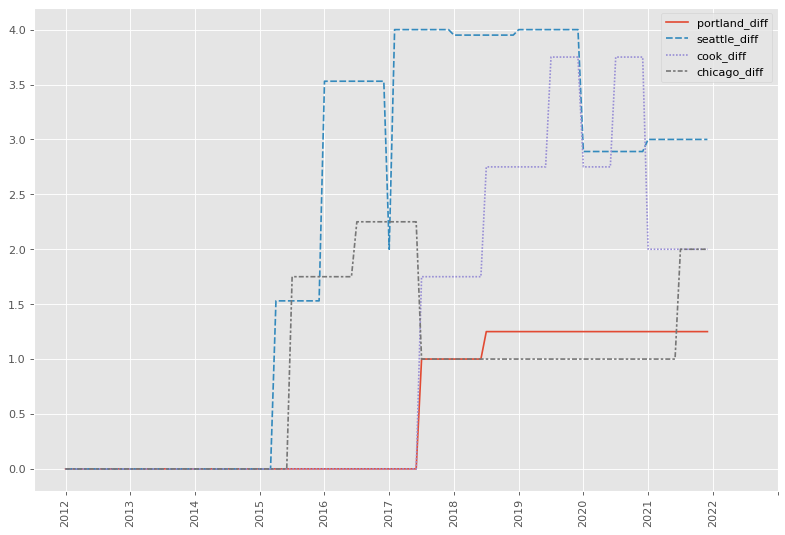

In [ ]:
figure(figsize=(12, 8), dpi=80)
mw['portland_diff'] = mw.portland_urban_growth_boundary - mw.oregon_standard
mw['seattle_diff'] = mw.seattle_large_NO_medical - mw.washington_state
mw['cook_diff'] = mw.cook_il - mw.illinois
mw['chicago_diff'] = mw.chicago_large - mw.cook_il
sns.lineplot(data=mw[['date', 'portland_diff', 'seattle_diff', 'cook_diff', 'chicago_diff']])
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

## **Number of reviews by state/region**

### All states



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


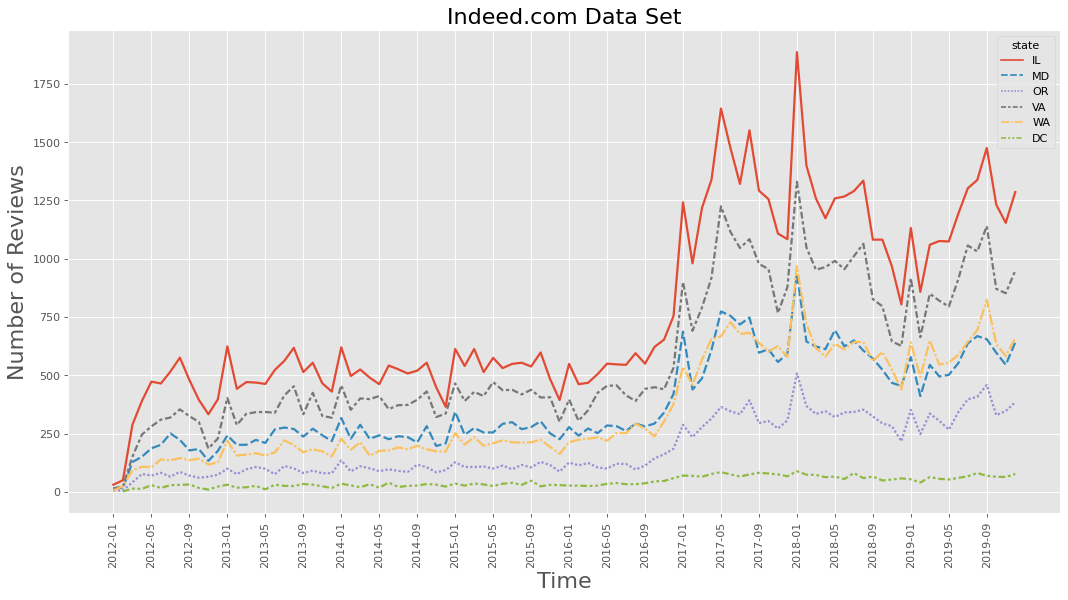

In [ ]:
data_viz = df[['month_year', 'state']]
data_viz = data_viz.groupby(['month_year', 'state']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'state', linewidth=2, style = 'state')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Washington state


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


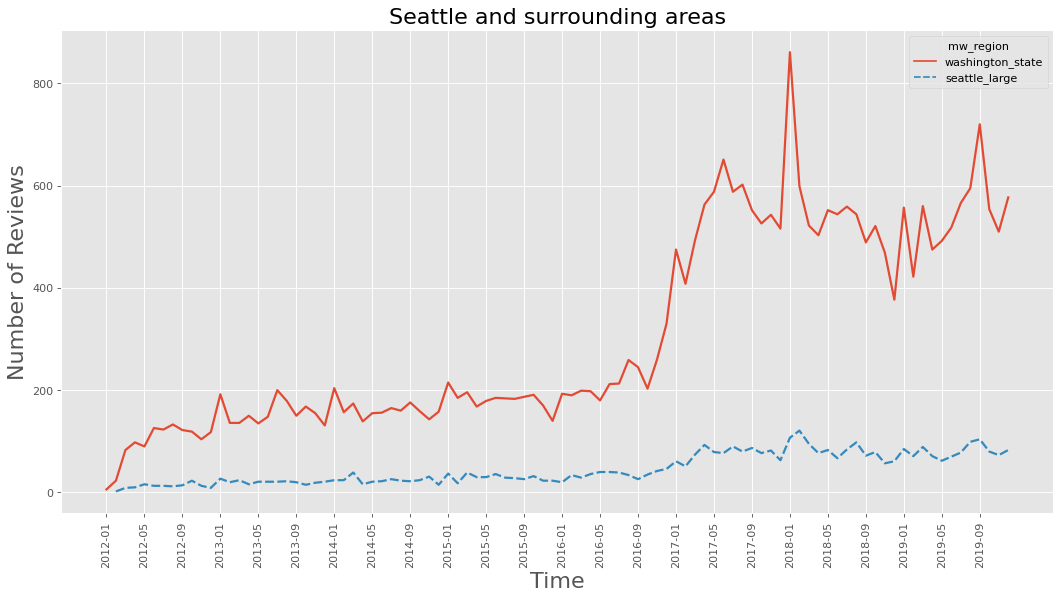

In [ ]:
state_viz = df[df.state=='WA']
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Seattle and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Oregon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


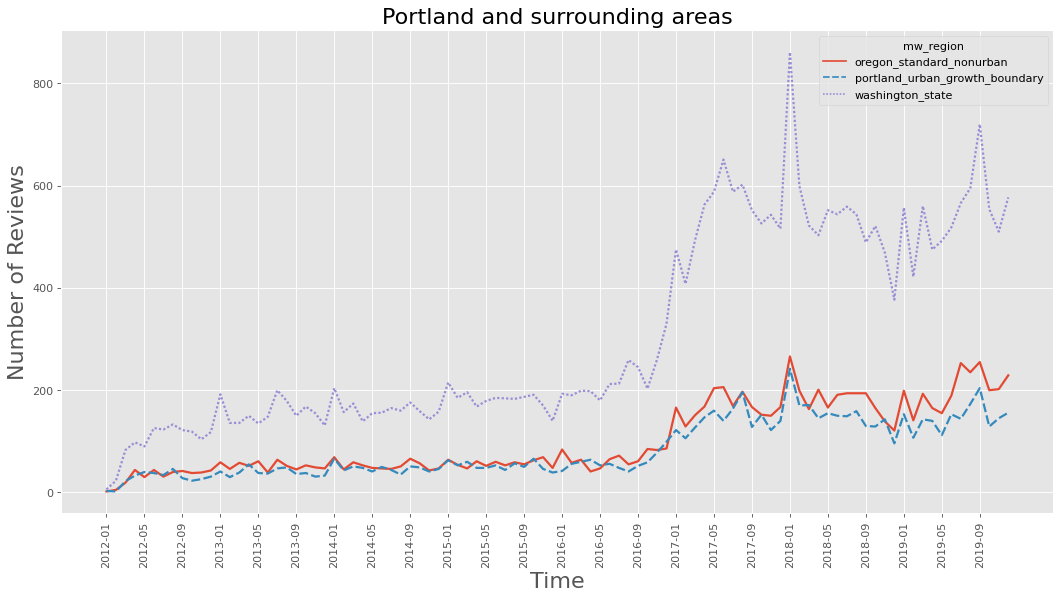

In [ ]:
or_viz = df[df.state=='OR']
wa_viz = df[df.mw_region=='washington_state']
state_viz = pd.concat([or_viz, wa_viz])
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Portland and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Illinois

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


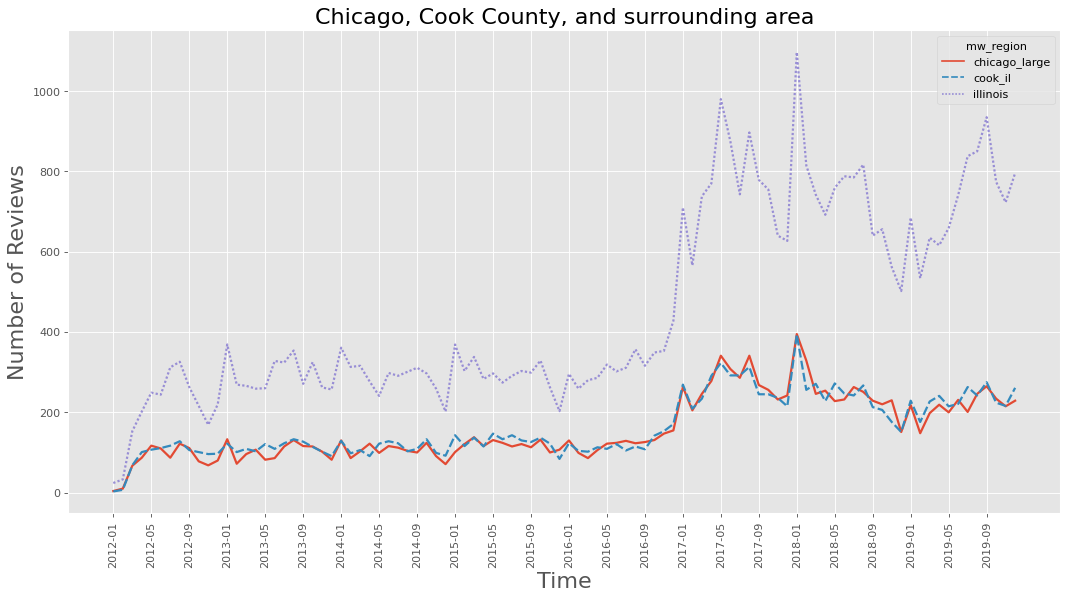

In [ ]:
state_viz = df[df.state=='IL']
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Chicago, Cook County, and surrounding area", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Maryland / Washington, D.C.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


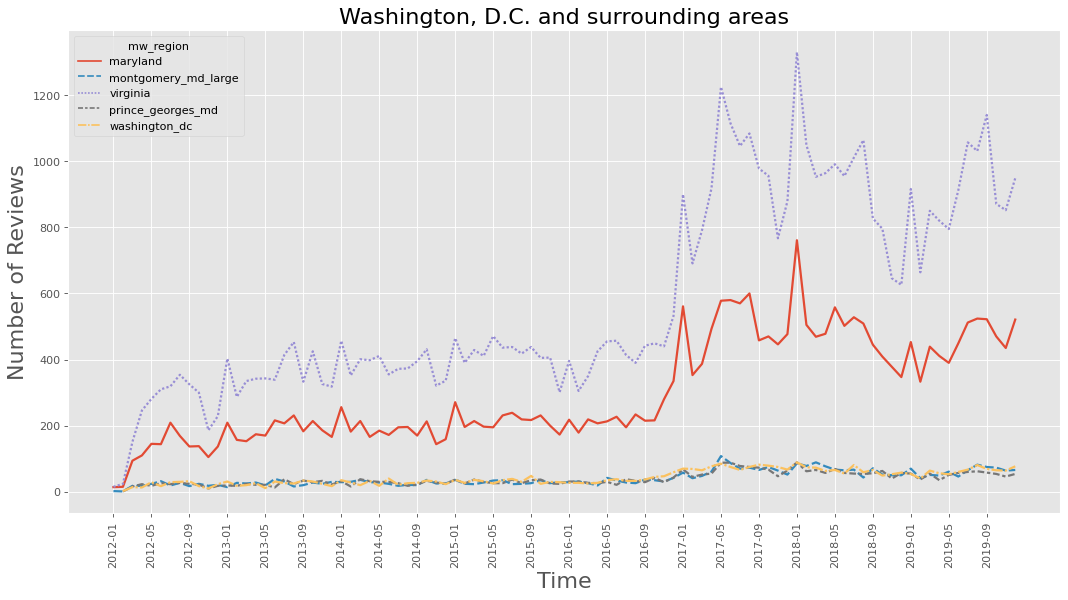

In [ ]:
state_viz = df[df.state.isin(['MD', 'VA', 'DC'])]
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)



sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Washington, D.C. and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

## **Top jobs**

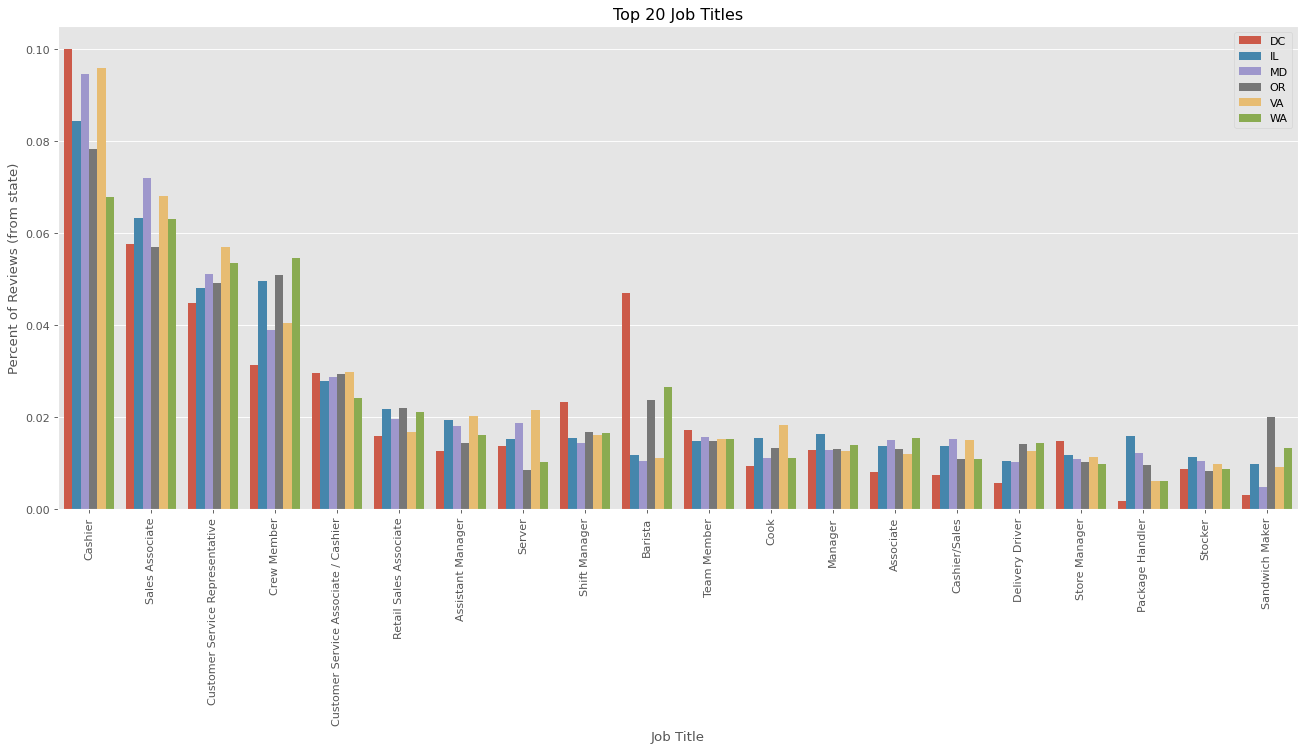

In [ ]:
figure(figsize=(20,8), dpi=80)
top_jobs = df.norm_job_title.value_counts(normalize=True)[:20].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]


# number of reviews by region and job title
perc = job_df.groupby('state')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = df.state.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]


# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'state', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'state', order = top_jobs)
plt.title("Top 20 Job Titles")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews (from state)')
plt.legend()

### Seattle area

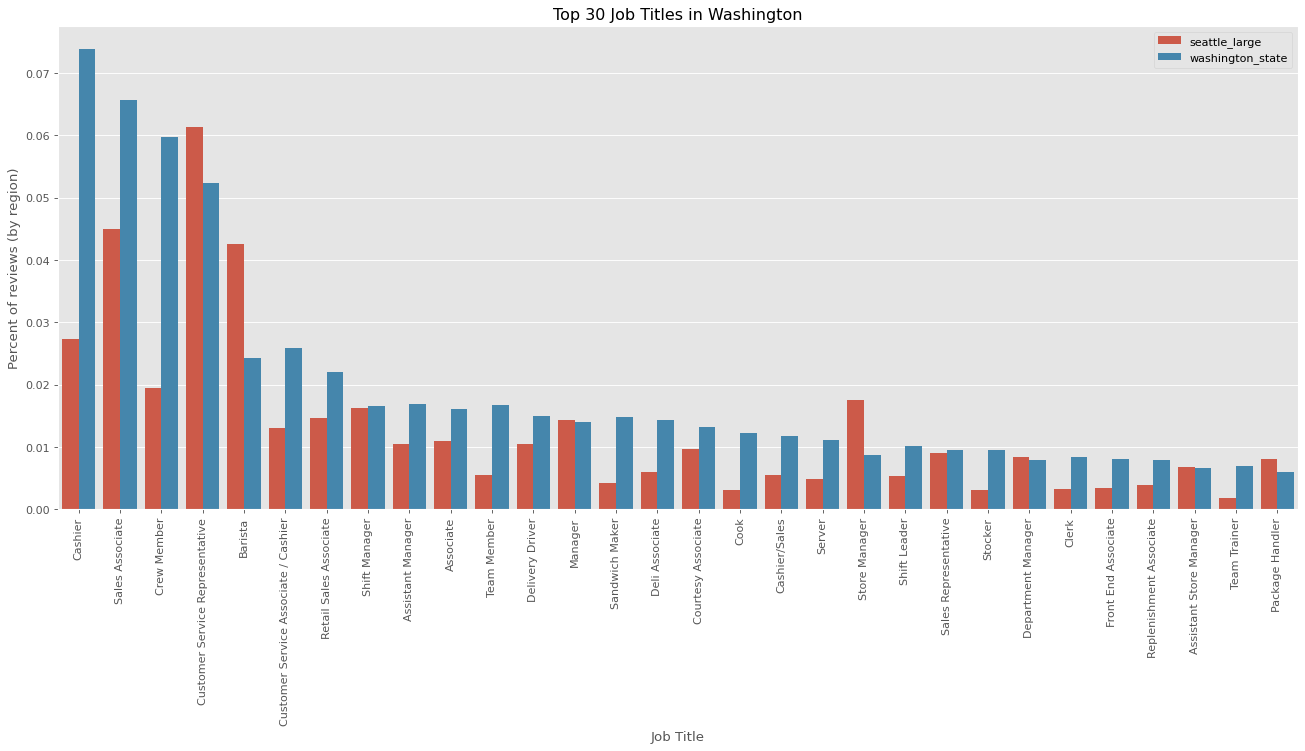

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.state=='WA']
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of reviews (by region)')
plt.legend()

Looking at Seattle alone, we notice some decidedly NOT minimum wage jobs creeping in...  Most likely from Amazon?

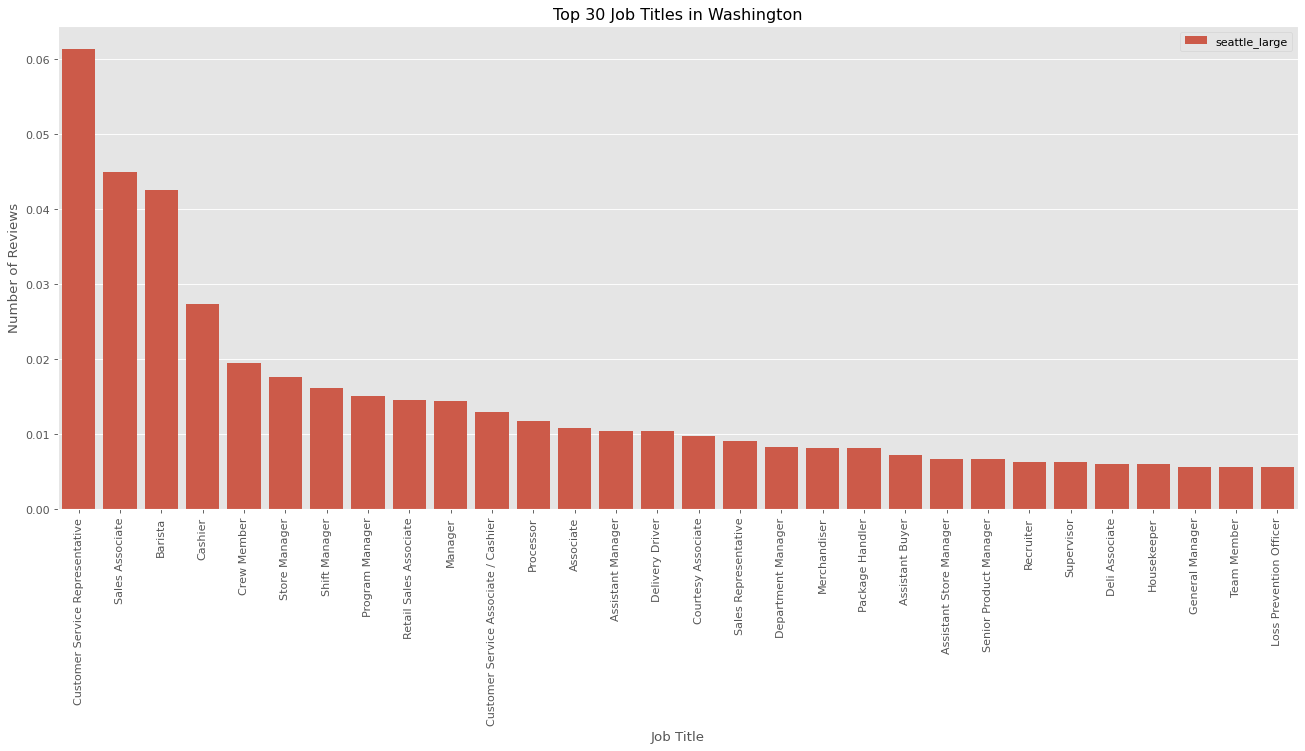

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region=='seattle_large']
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'mw_region', order = top_jobs)

#sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

### Oregon


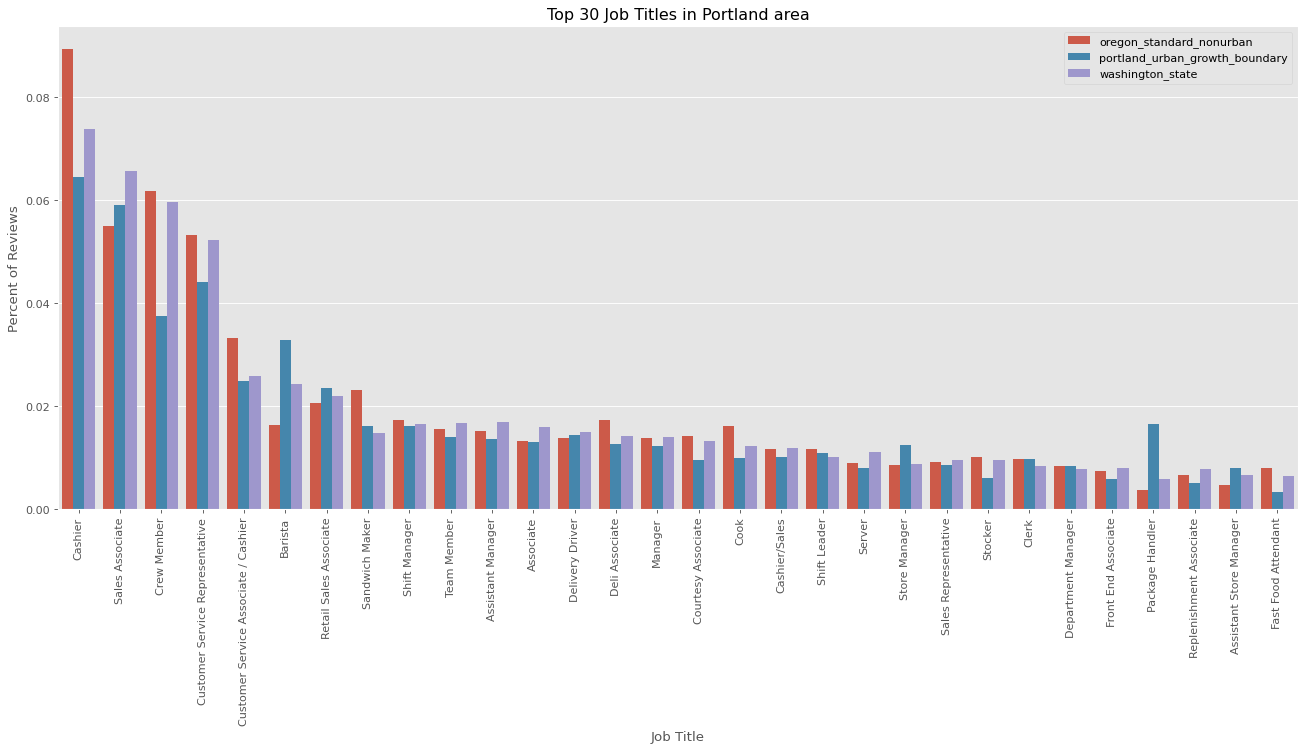

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['portland_urban_growth_boundary', 'oregon_standard_nonurban', 'washington_state'])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]


# number of reviews by region and job title
perc = job_df.groupby('mw_region')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Portland area")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

### Illinois

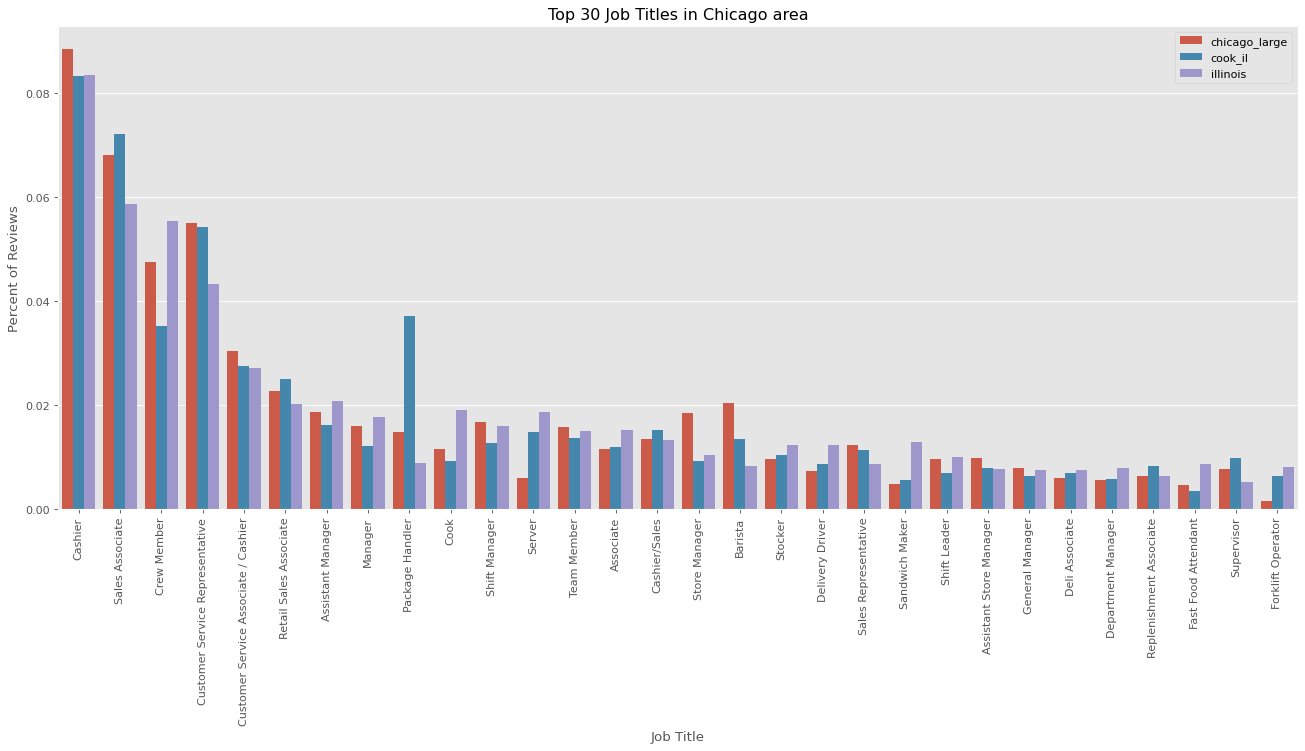

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['chicago_large', 'cook_il', 'illinois'])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Chicago area")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

### Maryland & D.C. Area

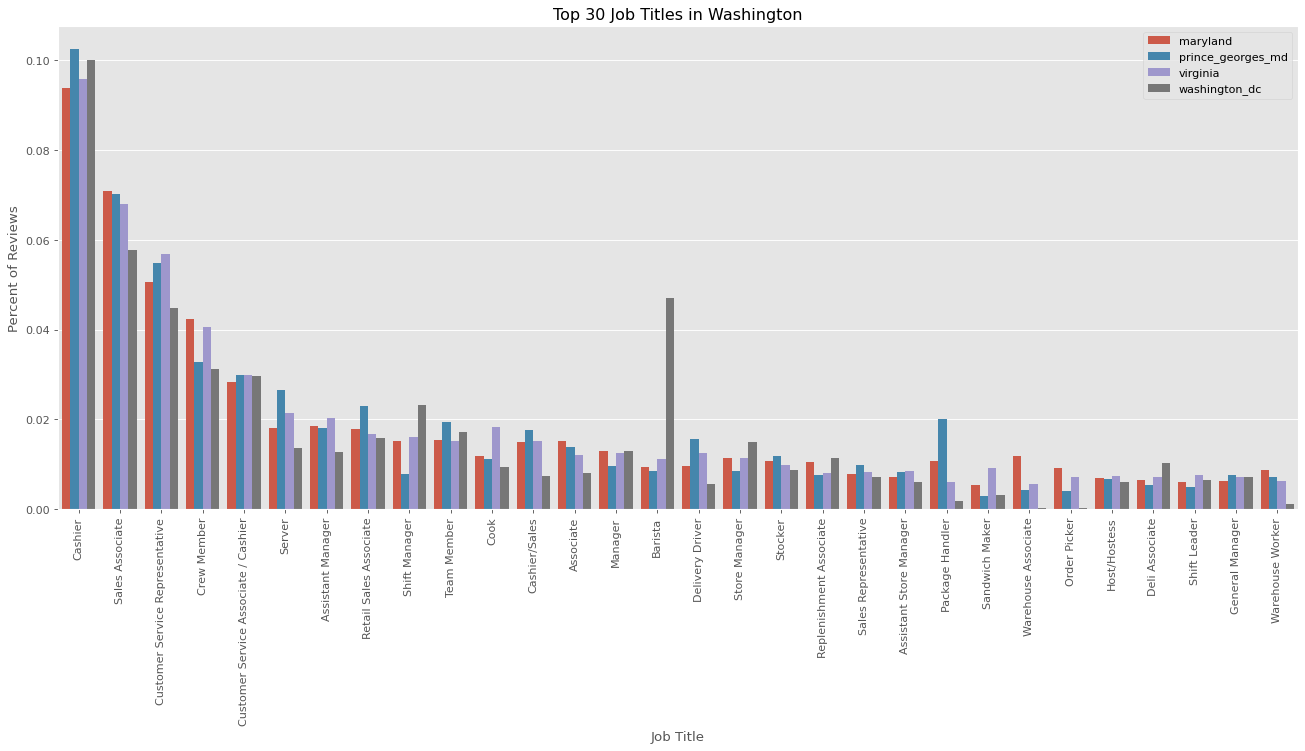

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['maryland', 'prince_georges_md', 'montgomery_md', 'washington_dc', 'virginia' ])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

## **Top companies**

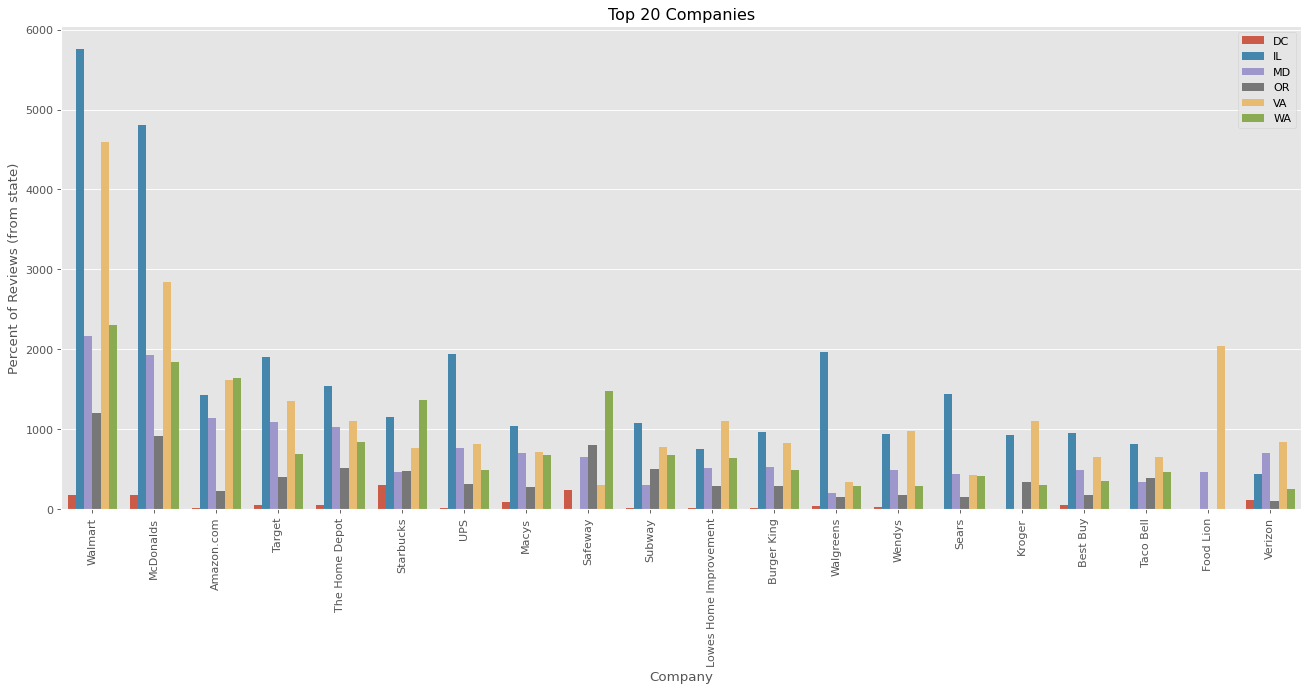

In [ ]:
figure(figsize=(20,8), dpi=80)
top_companies = df.company_name.value_counts(normalize=True)[:20].index.tolist()
company_df = df[df.company_name.isin(top_companies)]


# number of reviews by region and company title
perc = company_df.groupby('state')['company_name'].value_counts().astype(float)

# number of reviews in each region
total = df.state.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for comp in top_companies:
    try:
      perc[region][job] = perc[region][job]/total[region]
    except:
      perc[region][job] = 0

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'company_name':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='company_name',y='percentage', hue = 'state', order = top_companies)
#sns.countplot(data=job_df, x='company_name', hue = 'state', order = top_companies)
plt.title("Top 20 Companies")
plt.xlabel('Company')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews (from state)')
plt.legend()

### Seattle area

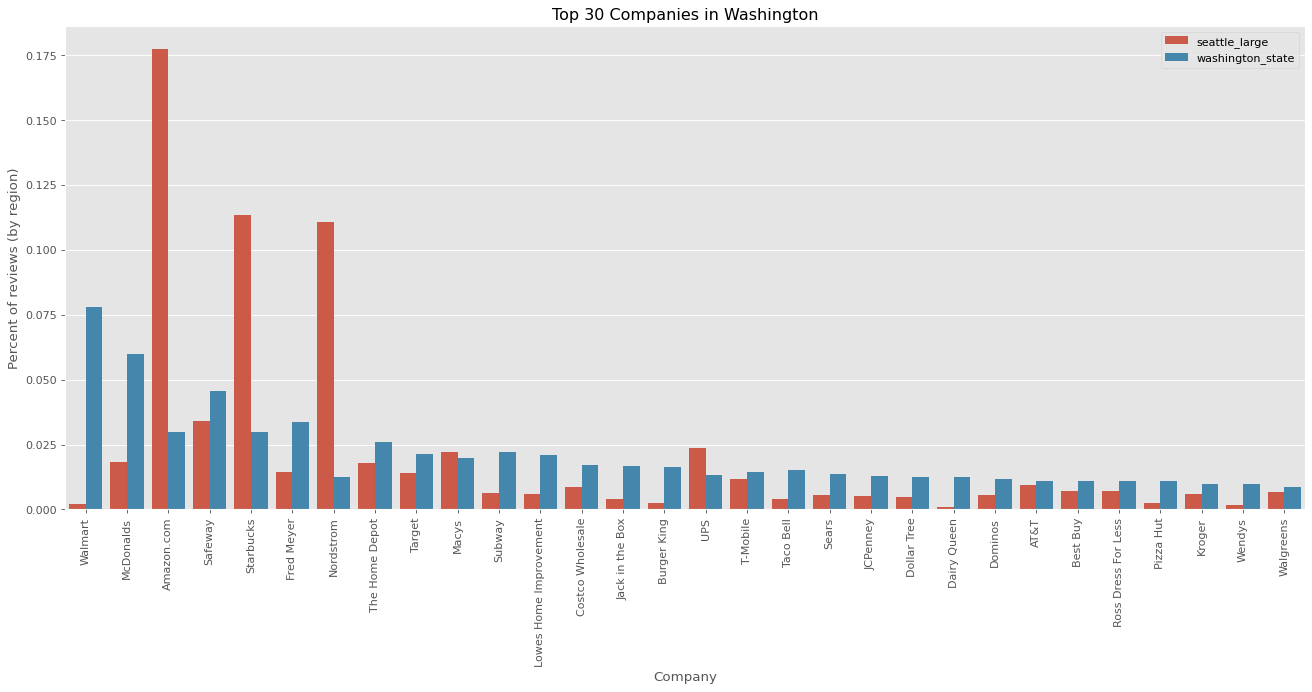

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.state=='WA']
top_jobs = state_df.company_name.value_counts()[:30].index.tolist()
job_df = state_df[state_df.company_name.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['company_name'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'company_name':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='company_name',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='company_name', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Companies in Washington")
plt.xlabel('Company')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of reviews (by region)')
plt.legend()

### Portland area

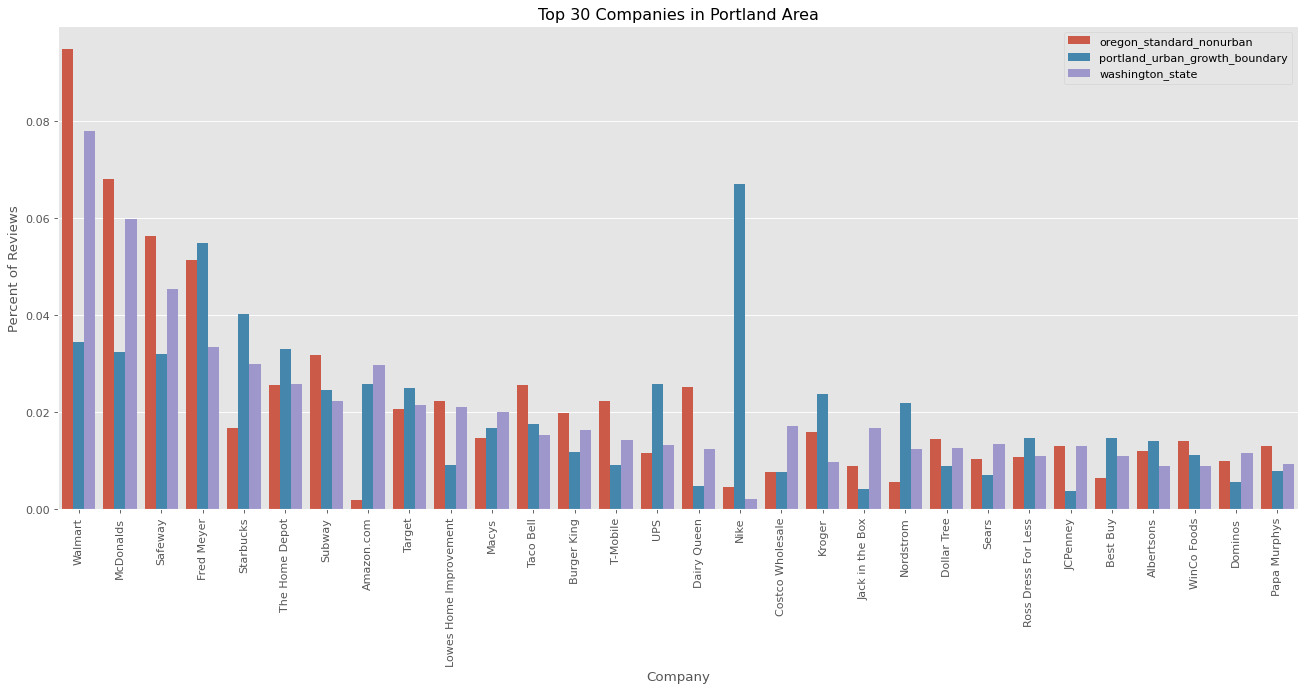

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['portland_urban_growth_boundary', 'oregon_standard_nonurban', 'washington_state'])]
top_jobs = state_df.company_name.value_counts()[:30].index.tolist()
job_df = state_df[state_df.company_name.isin(top_jobs)]


# number of reviews by region and job title
perc = job_df.groupby('mw_region')['company_name'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'company_name':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='company_name',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='company_name', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Companies in Portland Area")
plt.xlabel('Company')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

###  Illinois



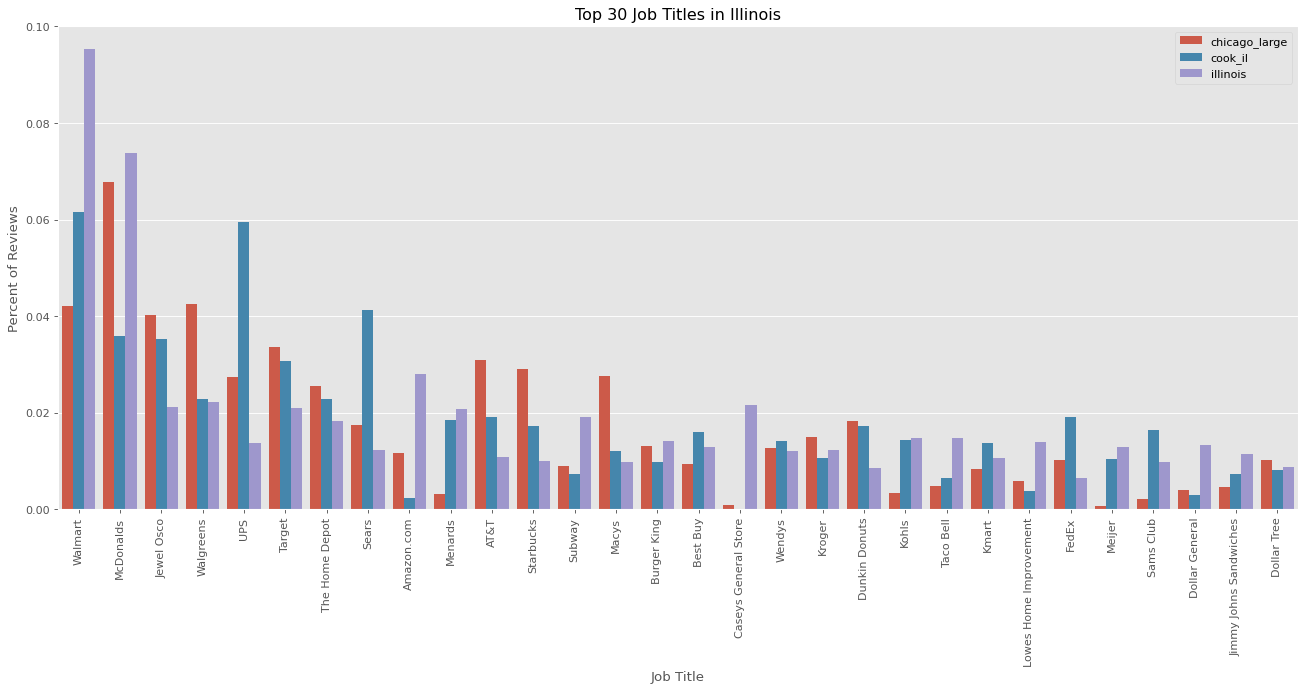

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['chicago_large', 'cook_il', 'illinois'])]
top_jobs = state_df.company_name.value_counts()[:30].index.tolist()
job_df = state_df[state_df.company_name.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['company_name'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    try:
      perc[region][job] = perc[region][job]/total[region]
    except:
      perc[region][job] = 0

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'company_name':'percentage'})
perc = perc.reset_index()

sns.barplot(data=perc, x='company_name',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='company_name', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Illinois")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

### Maryland

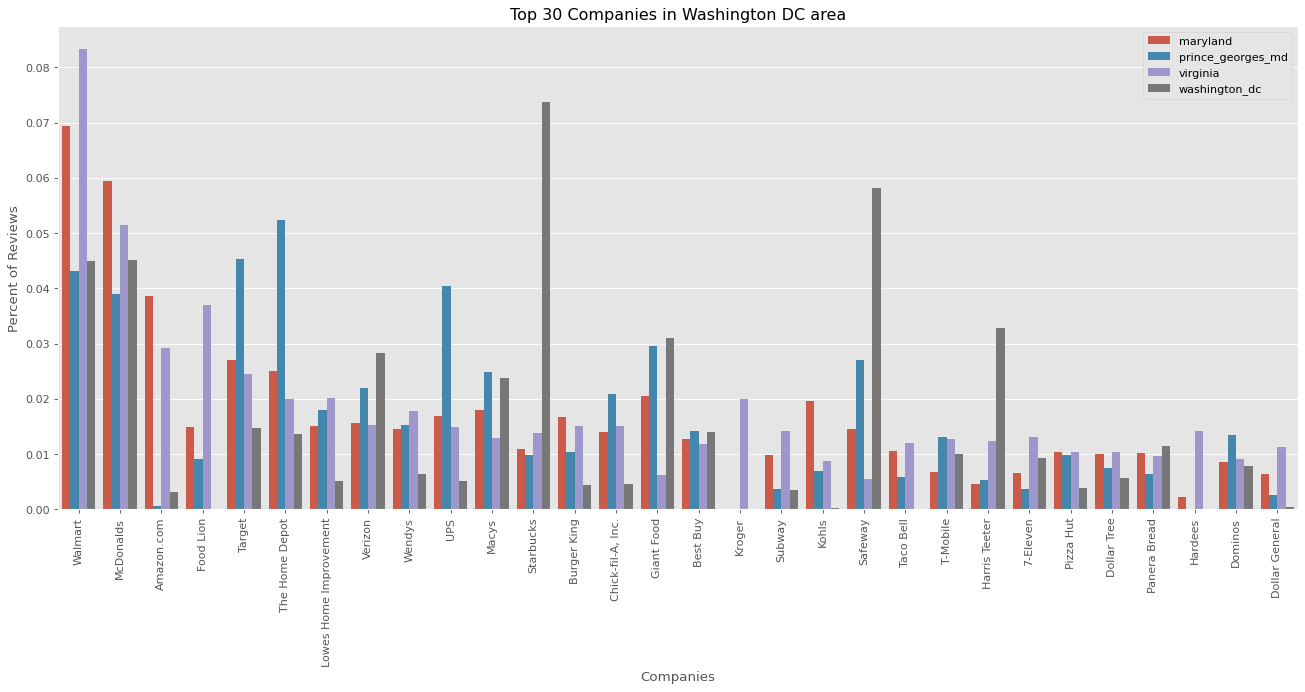

In [ ]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['maryland', 'prince_georges_md', 'montgomery_md', 'washington_dc', 'virginia' ])]
top_jobs = state_df.company_name.value_counts()[:30].index.tolist()
job_df = state_df[state_df.company_name.isin(top_jobs)]

# number of reviews by region and job title
perc = job_df.groupby('mw_region')['company_name'].value_counts().astype(float)

# number of reviews in each region
total = state_df.mw_region.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    try:
      perc[region][job] = perc[region][job]/total[region]
    except:
      perc[region][job] = 0

# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'company_name':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='company_name',y='percentage', hue = 'mw_region', order = top_jobs)
#sns.countplot(data=job_df, x='company_name', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Companies in Washington DC area")
plt.xlabel('Companies')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews')
plt.legend()

## **Creating R output**

In [ ]:



# columns to use
r = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_year','month_year', 'company_name', 'norm_job_title', 'review_date', 'city', 'state', 'mw_region','min_wage_val']]


# indicators
r['post'] = 0

print(r.columns)


'''
df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)
'''

Index(['overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_year', 'month_year', 'company_name', 'norm_job_title',
       'review_date', 'city', 'state', 'mw_region', 'min_wage_val', 'post'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


"\ndf['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')\n\nrdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',\n          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', \n          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]\nrdf.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)\n"

## **Creating a WA file for R**

In [ ]:
wash = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_date', 'review_year','month_year', 'company_name', 'norm_job_title', 'city', 'state', 'mw_region','min_wage_val']]

wash = wash[wash.state == 'WA']

wash['post'] = 0
mask = (df['review_date']>='04/01/2015')
wash.post[mask]=1

wash['treat_loc'] = 0
wash.treat_loc = wash[wash.treat_loc == 'seattle_large'] = 1

wash.shape

wash.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)

wash.treat_loc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


22         0
245        0
570        0
603        0
689        0
          ..
2400375    0
2400534    0
2400561    0
2400669    0
2400699    0
Name: treat_loc, Length: 33747, dtype: int64

In [ ]:
# columns to use
r = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_date', 'review_year','month_year', 'company_name', 'norm_job_title', 'city', 'state', 'mw_region','min_wage_val']]

r.to_csv('/content/drive/MyDrive/hannah_research/data/rdf.csv', index=False)


In [ ]:
# columns to use
r = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_year','month_year', 'company_name', 'norm_job_title', 'review_date', 'city', 'state', 'mw_region','min_wage_val']]


# indicators
r['post'] = 0

print(r.columns)


'''
df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)
'''

In [ ]:
# columns to use
r = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_year','month_year', 'company_name', 'norm_job_title', 'review_date', 'city', 'state', 'mw_region','min_wage_val']]


# indicators
r['post'] = 0

print(r.columns)


'''
df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)
'''

## **Conversation topics (by year)**

# **NOTES**

Baltimore vs DC

Equity - theme of the times

Does minimum wage work to promote equity?  Blunt instrument?

Literature review - local vs regional vs state - summary for next meeting

Urban vs Rural

# **TOPICS FOR DISCUSSION AT NEXT MEETING**



1.   Scope of MW wage paper--before pandemic?
2.   Second paper with same dataset -- impact of pandemic?

